In [225]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

import torch
from torch import nn
from torch import optim
import torch.distributions as D

import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torchvision
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
import pathlib

In [226]:
transformer = transforms.Compose([
    #transforms.Grayscale()
    transforms.Resize((32,32)),
    transforms.CenterCrop(size=32),
    transforms.ToTensor(),
    #transforms.Flatten()
])

In [227]:
train_path='celeb_faces\Celebrities'
test_path='celeb_faces\Celebrities'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder (train_path,transform=transformer),
    batch_size=64,
    shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=10,
    shuffle=True
)

In [228]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [229]:
classes

['aaron_taylor_johnson',
 'abigail_breslin',
 'adam_sandler',
 'adrianne_palicki',
 'alan_arkin',
 'alec_baldwin',
 'alexis_thorpe',
 'amanda_seyfried',
 'amy_adams',
 'andrew_garfield',
 'angelina_jolie',
 'anjelica_huston',
 'anna_kendrick',
 'anna_paquin',
 'annasophia_robb',
 'anthony_hopkins',
 'barbra_streisand',
 'ben_affleck',
 'ben_kingsley',
 'ben_stiller',
 'benedict_cumberbatch',
 'bette_midler',
 'betty_white',
 'bill_murray',
 'brad_pitt',
 'bradley_cooper',
 'brenda_fricker',
 'bruce_willis',
 'bryan_cranston',
 'buster_keaton',
 'cameron_diaz',
 'carey_mulligan',
 'carol_burnett',
 'cary_grant',
 'cate_blanchett',
 'catherine_zeta_jones',
 'channing_tatum',
 'charlie_hunnam',
 'charlize_theron',
 'cher',
 'chloe_grace_moretz',
 'chris_cooper',
 'chris_evans',
 'chris_hemsworth',
 'christian_bale',
 'christina_ricci',
 'christopher_lee',
 'christopher_plummer',
 'christopher_walken',
 'cloris_leachman',
 'colin_farrell',
 'cuba_gooding_jr',
 'dakota_fanning',
 'daniel_cr

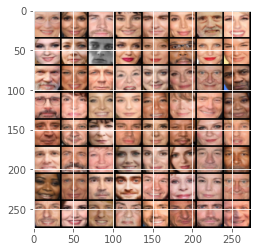

In [230]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))

In [329]:
from gmm_model import GaussianMixture
gmm=GaussianMixture(n_components=len(classes),n_features=size*size)

In [330]:
gmm.fit(images_tensor)

RuntimeError: [enforce fail at C:\cb\pytorch_1000000000000\work\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 204590284800 bytes.

In [232]:
class Flatten(object):
    def __call__(self, tensor):
        return tensor.view(-1, 1)

In [233]:
size=16

In [234]:
transformer = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((size,size)),
    transforms.CenterCrop(size=size),
    transforms.ToTensor(),
    Flatten()
])

In [235]:
train_path='celeb_faces\Celebrities'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder (train_path,transform=transformer),
    batch_size=512,
    shuffle=True
)

In [272]:
images = []
celebs=[]
for i, data in enumerate(train_loader):
    inputs, labels = data
    celebs.append(labels)

    for input in inputs:
        input_gray = input.detach().numpy().squeeze().flatten()
        images.append(input_gray)
        
        
# converting the list of grayscale images to a pandas dataframe
images_df=pd.DataFrame(images)
images_tensor=torch.tensor(np.array(images_df))
images_tensor

tensor([[0.6667, 0.6902, 0.7333,  ..., 0.7255, 0.6627, 0.6471],
        [0.5608, 0.6549, 0.6902,  ..., 0.6353, 0.6039, 0.5647],
        [0.4078, 0.5294, 0.7059,  ..., 0.8431, 0.8510, 0.8196],
        ...,
        [0.7373, 0.7608, 0.7843,  ..., 0.5059, 0.3412, 0.2314],
        [0.5020, 0.5686, 0.6235,  ..., 0.4824, 0.3647, 0.3686],
        [0.7451, 0.7765, 0.7725,  ..., 0.4745, 0.4510, 0.5059]])

In [273]:
images_df.shape

(3025, 256)

In [274]:
labels=[]
for label_set in celebs:
    labels.append(label_set.detach().numpy().squeeze())

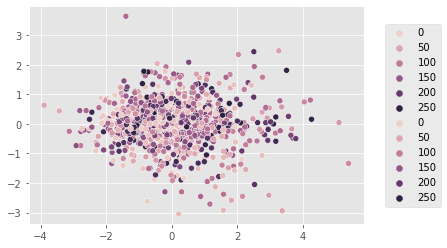

In [275]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
transformed_df=pca.fit_transform(images_df)

## transformed_df IS THE DATAFRAME OBTAINED AFTER REDUCING THE DIMENSIONS OF THE ORIGINAL DATA TO TWO COMPONENTS

sns.scatterplot(x=transformed_df[:512,0],y=transformed_df[:512,1],hue=labels[0])
sns.scatterplot(x=transformed_df[512:1024,0],y=transformed_df[512:1024,1],hue=labels[1])


plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

In [276]:
len(classes)

258

## TRAINING

In [339]:
num_centers = len(classes)
weights = torch.ones(num_centers,requires_grad=True)
means = torch.tensor(np.random.randn(len(classes),size*size),requires_grad=True)
stdevs = torch.tensor(np.abs(np.random.randn(len(classes),size*size)),requires_grad=True)

parameters = [weights, means, stdevs]
optimizer1 = optim.SGD(parameters, lr=0.0001, momentum=0.8)
epochs=1
loss_curve=[]
for epoch in range(epochs):
    for i in range(len(images_tensor)-1000):
        mix = D.Categorical(weights)
        comp = D.Independent(D.Normal(means,stdevs), 1)
        gmm = D.MixtureSameFamily(mix, comp)

        optimizer1.zero_grad()
        x = images_tensor[i] #this can be an arbitrary x samples
        loss2 = -gmm.log_prob(x)#-densityflow.log_prob(inputs=x).mean()
        loss2.backward()
        optimizer1.step()

        loss_curve.append(loss2.detach().numpy())


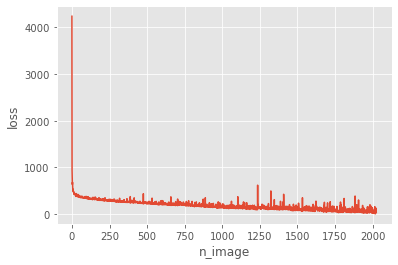

In [340]:
plt.plot(loss_curve)
plt.xlabel('n_image')
plt.ylabel('loss')
plt.show()

In [341]:
mix = D.Categorical(weights)
comp = D.Independent(D.Normal(means,stdevs), 1)
gmm = D.MixtureSameFamily(mix, comp)

In [342]:
gmm.sample()

tensor([-0.9391,  1.9026,  0.1677,  1.9178,  0.0336, -2.9177, -0.4600,  1.9767,
        -1.5547,  0.3407, -0.8144,  1.1163, -1.0498, -1.8912, -0.6495,  2.2466,
         1.3622, -1.2884,  1.3556,  1.3170, -1.9882,  0.1712, -0.2270,  0.8906,
        -0.2701,  1.9475, -1.0675, -0.8193,  0.6790,  1.8337, -0.8077,  0.6730,
        -0.0867,  3.8920, -1.2072, -0.6961,  1.7797,  0.8378, -1.6186, -0.7457,
         0.9901, -4.0148, -0.4887, -2.6362, -3.1050, -2.4117, -0.8717,  1.6553,
         0.7287,  2.0033, -0.3286, -0.5222, -0.1551,  1.0663,  0.4700, -0.3639,
        -0.1697,  0.2093, -1.6065,  0.6444,  2.4256, -1.4536,  1.5467, -1.3655,
         0.1140, -3.8262,  0.4762,  1.9260,  1.0009,  0.6085,  0.4986,  1.1498,
         3.1234, -0.4233, -1.7870, -3.1661,  2.8805, -3.7785,  0.4167, -1.7272,
        -0.5628,  1.0428,  3.6033, -0.8751, -3.3763,  2.3132,  1.0105,  0.3500,
         1.0145,  0.3926, -0.3409, -4.1279,  1.4337, -2.3717, -0.6647,  0.5920,
        -0.1710, -0.0414,  0.9299,  1.09

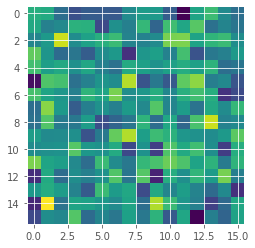

In [347]:
plt.imshow(gmm.sample().view(size,-1))

In [296]:
from sklearn.mixture import GaussianMixture
model= GaussianMixture(n_components=len(classes))

In [297]:
images_arr=images_tensor.detach().numpy()

In [298]:
images_arr

array([[0.6666667 , 0.6901961 , 0.73333335, ..., 0.7254902 , 0.6627451 ,
        0.64705884],
       [0.56078434, 0.654902  , 0.6901961 , ..., 0.63529414, 0.6039216 ,
        0.5647059 ],
       [0.40784314, 0.5294118 , 0.7058824 , ..., 0.84313726, 0.8509804 ,
        0.81960785],
       ...,
       [0.7372549 , 0.7607843 , 0.78431374, ..., 0.5058824 , 0.34117648,
        0.23137255],
       [0.5019608 , 0.5686275 , 0.62352943, ..., 0.48235294, 0.3647059 ,
        0.36862746],
       [0.74509805, 0.7764706 , 0.77254903, ..., 0.4745098 , 0.4509804 ,
        0.5058824 ]], dtype=float32)

In [299]:
model.fit(images_arr)

GaussianMixture(n_components=258)

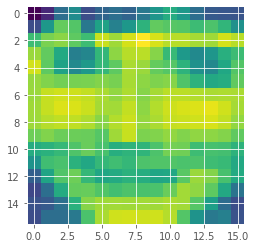

In [327]:
plt.imshow(np.array(model.sample()[0][0]).reshape(size,-1))